In [15]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

In [16]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

print('The current size of our dataset is : \nX_train -> '
      ,X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' 
      , X_test.shape,'\ny_test' , y_test.shape )

The current size of our dataset is : 
X_train ->  (60000, 28, 28) 
y_train ->  (60000,) 
X_test ->  (10000, 28, 28) 
y_test (10000,)


In [17]:
# we convert the data to 2D(numsample , image_dimension) 
#with our images present as 1D vectors
X_train = X_train.reshape(len(X_train),-1)
X_test = X_test.reshape(len(X_test),-1)

print('The current size of our dataset is : \nX_train -> '
      ,X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' 
      , X_test.shape,'\ny_test' , y_test.shape )

# now we normalize our data
X_train = X_train/255
X_test = X_test/255

The current size of our dataset is : 
X_train ->  (60000, 784) 
y_train ->  (60000,) 
X_test ->  (10000, 784) 
y_test (10000,)


In [18]:
# org X_train is taking a lot of time so i am shortening the size
X_test_small,y_test_small = X_test[:1000],y_test[:1000]
X_train_small,y_train_small = X_train[:1000],y_train[:1000]

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, 
                           multi_class='multinomial', solver='lbfgs')
model.fit(X_train_small, y_train_small)
y_pred = model.predict(X_test_small)

accuracy = np.sum(y_pred == y_test_small)/ len(y_test_small)
# i am printing less labels for better view
print(f"Predicted labels: {y_pred[:50]}")
print(f"Actual labels:    {y_test_small[:50]}")
print(f"Accuracy: {accuracy * 100:.2f}%")


C:\Users\anshb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Predicted labels: [7 6 1 0 4 1 4 9 2 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 6 7 2 7
 1 2 1 1 7 4 2 5 5 1 2 4 4]
Actual labels:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
Accuracy: 83.90%


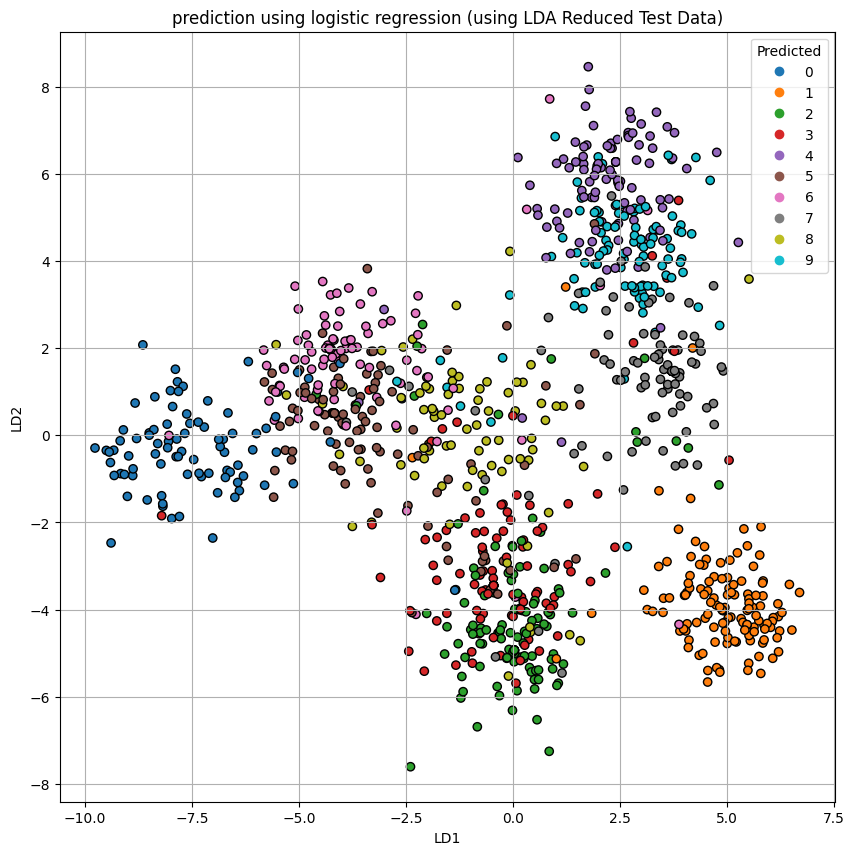

'\nWe observe that the accuracy of 83.90% for the Logistic \nRegression classifier is significantly higher than Naive Bayes. \nThis is due to Logistic Regressions ability to capture more \ncomplex patterns and relationships between features, especially \nwhen compared to the strong independence assumption of Naive Bayes. \n'

In [20]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_reduced = lda.fit_transform(X_test_small, y_test_small)

'''
X_test was the data reduced to 2 dimension 
and y_test is the label to classify them
'''
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='tab10', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Predicted")
plt.title("prediction using logistic regression"
" (using LDA Reduced Test Data)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.grid(True)
plt.show()

'''
We observe that the accuracy of 83.90% for the Logistic 
Regression classifier is significantly higher than Naive Bayes. 
This is due to Logistic Regressions ability to capture more 
complex patterns and relationships between features, especially 
when compared to the strong independence assumption of Naive Bayes. 
'''